<a href="https://colab.research.google.com/github/alysson050/PrimeiraAtividadePython/blob/main/AtividadeSobreGr%C3%A1ficoscomPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


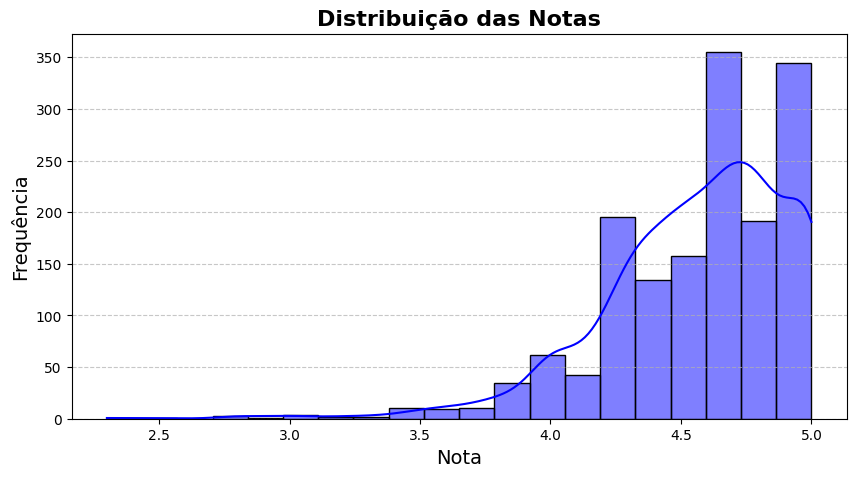

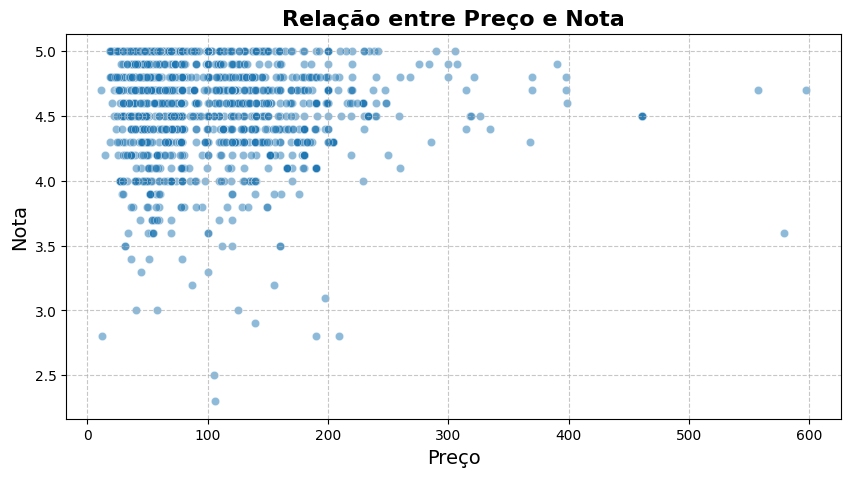

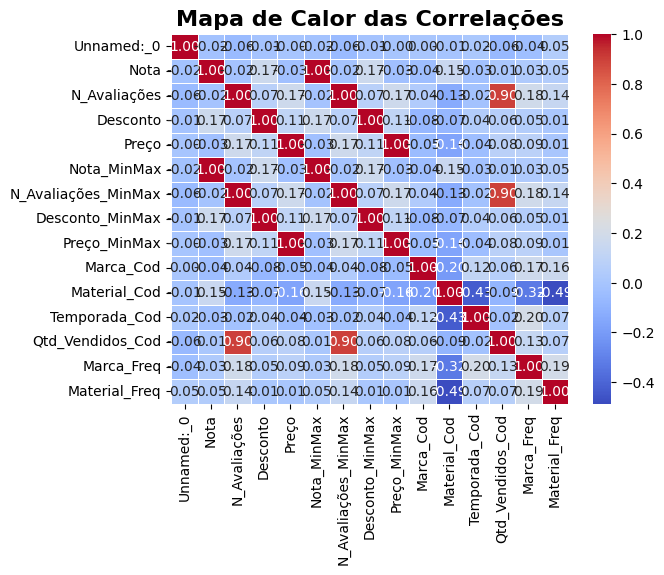

<ipython-input-9-fcd4de2f547b>:67: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, barras[i] + 0.05, f"{barras[i]:.2f}", ha="center", fontsize=10, fontweight="bold", color="black")


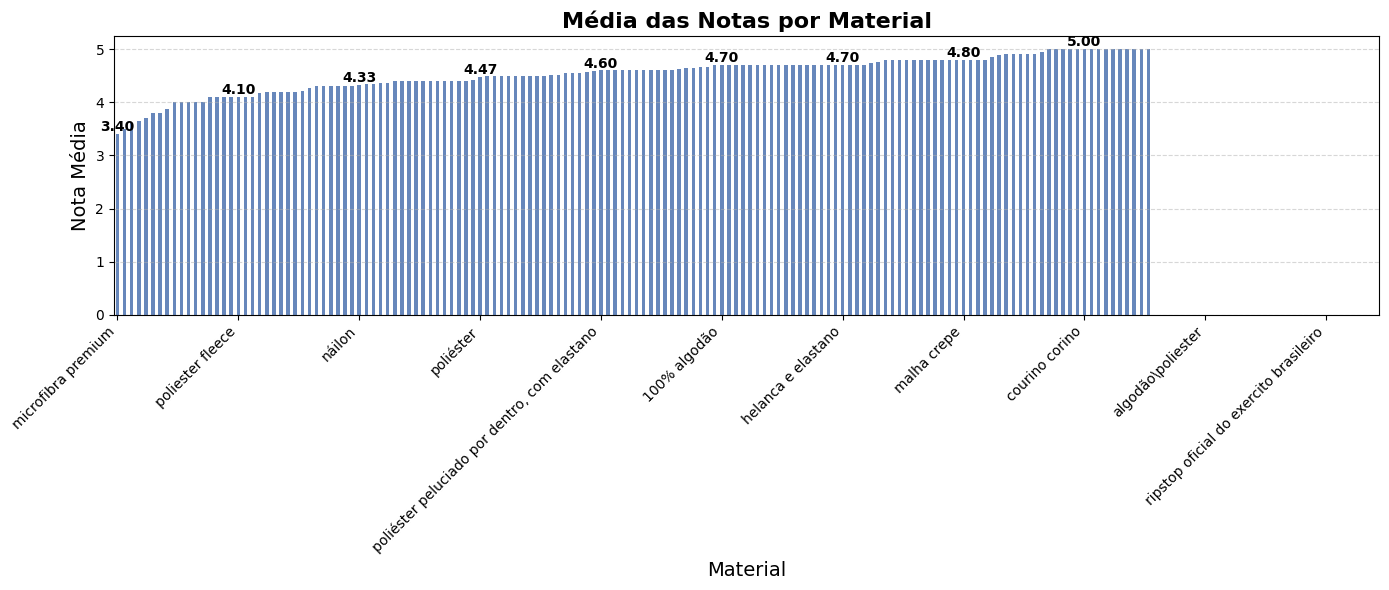

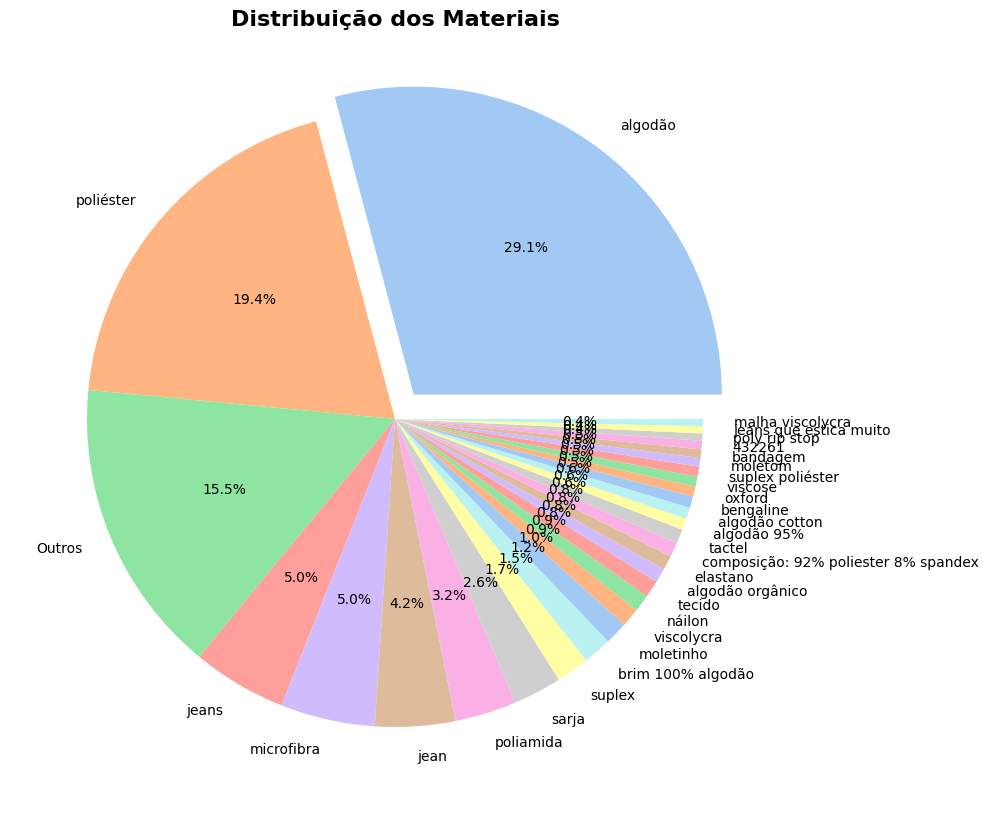

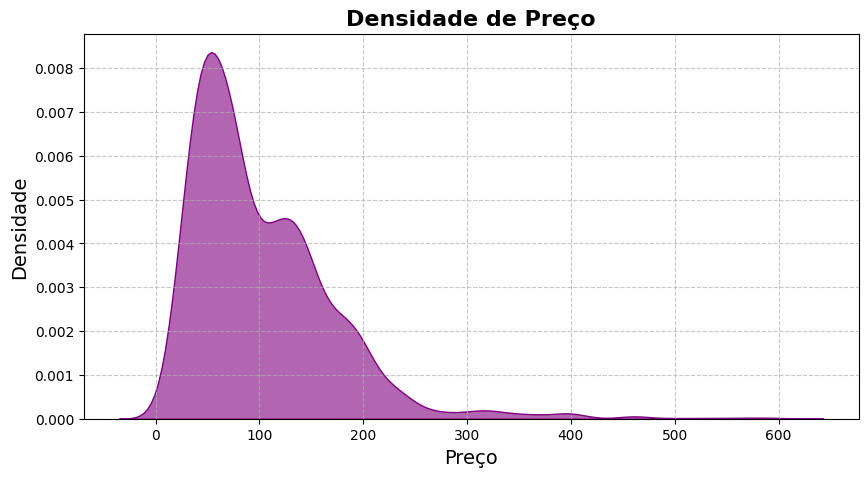

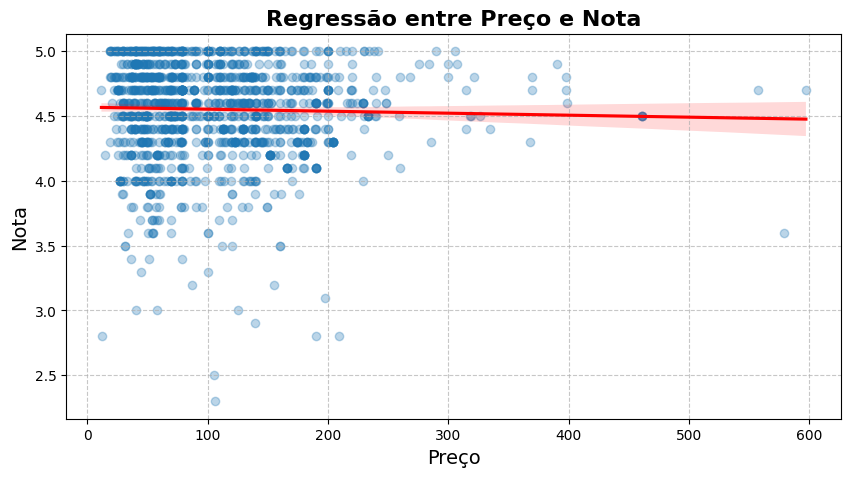

In [9]:

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive')

# Caminho do arquivo CSV na primeira pasta do meu Google Drive
file_path = '/content/drive/MyDrive/ecommerce_preparados.csv'

# Carregar o CSV no pandas
df = pd.read_csv(file_path) # Use the file_path variable here

# Exibir as primeiras linhas
df.head()

# Corrigir nomes de colunas
colunas_corrigidas = {col: col.strip().replace(" ", "_") for col in df.columns}
df.rename(columns=colunas_corrigidas, inplace=True)

# Criar uma pasta para salvar os gráficos
os.makedirs("graficos", exist_ok=True)

### 1. HISTOGRAMA
plt.figure(figsize=(10, 5))
sns.histplot(df["Nota"], bins=20, kde=True, color="blue")
plt.title("Distribuição das Notas", fontsize=16, fontweight="bold")
plt.xlabel("Nota", fontsize=14)
plt.ylabel("Frequência", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig("graficos/histograma.png")
plt.show()

### 2. GRÁFICO DE DISPERSÃO
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="Preço", y="Nota", alpha=0.5)  # Changed "Preco" to "Preço"
plt.title("Relação entre Preço e Nota", fontsize=16, fontweight="bold")
plt.xlabel("Preço", fontsize=14)
plt.ylabel("Nota", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.savefig("graficos/dispersao.png")
plt.show()

### 3. MAPA DE CALOR (Correlação entre variáveis numéricas)
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Calor das Correlações", fontsize=16, fontweight="bold")
plt.savefig("graficos/mapa_calor.png")
plt.show()

### 4. GRÁFICO DE BARRAS (Melhorado para melhor visibilidade)
barras = df.groupby("Material")["Nota"].mean().sort_values()
plt.figure(figsize=(14, 6))
barras.plot(kind="bar", color="#4C72B0", alpha=0.85)
plt.title("Média das Notas por Material", fontsize=16, fontweight="bold")
plt.xlabel("Material", fontsize=14)
plt.ylabel("Nota Média", fontsize=14)

# Ajustando rótulos para evitar sobreposição
plt.xticks(ticks=range(0, len(barras), max(1, len(barras)//10)),
           labels=barras.index[::max(1, len(barras)//10)],
           rotation=45, ha="right", fontsize=10)

# Adicionando valores em algumas barras
for i in range(0, len(barras), max(1, len(barras)//10)):
    plt.text(i, barras[i] + 0.05, f"{barras[i]:.2f}", ha="center", fontsize=10, fontweight="bold", color="black")

plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.savefig("graficos/barras.png")
plt.show()

### 5. GRÁFICO DE PIZZA (Distribuição de Categorias)
if 'Material' in df.columns:  # Verifica se a coluna 'Material' existe

    # Agrupar categorias menos frequentes
    limite_frequencia = 5  # Categorias com menos de 5 ocorrências serão agrupadas
    categoria_contagem = df["Material"].value_counts()
    categorias_agrupar = categoria_contagem[categoria_contagem < limite_frequencia].index
    df.loc[df["Material"].isin(categorias_agrupar), "Material"] = "Outros"

    # Gerar o gráfico de pizza com a coluna 'Material' atualizada
    categoria_contagem = df["Material"].value_counts()
    plt.figure(figsize=(10, 10))  # Aumentar o tamanho da figura

    # Explodir as fatias mais importantes
    explode = [0.1] + [0] * (len(categoria_contagem) -1)  # Create explode tuple dynamically

    plt.pie(categoria_contagem, labels=categoria_contagem.index, autopct="%1.1f%%", colors=sns.color_palette("pastel"), explode=explode)
    plt.title("Distribuição dos Materiais", fontsize=16, fontweight="bold")  # Título ajustado
    plt.savefig("graficos/pizza_material.png")  # Nome do arquivo ajustado
    plt.show()
else:
    print("A coluna 'Material' não foi encontrada no DataFrame.")
    # Imprimir as colunas do DataFrame para verificação
    print("Colunas do DataFrame:", df.columns)

### 6. GRÁFICO DE DENSIDADE
plt.figure(figsize=(10, 5))
sns.kdeplot(df["Preço"], fill=True, color="purple", alpha=0.6) # Changed "Preco" to "Preço"
plt.title("Densidade de Preço", fontsize=16, fontweight="bold")
plt.xlabel("Preço", fontsize=14)
plt.ylabel("Densidade", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.savefig("graficos/densidade.png")
plt.show()

### 7. GRÁFICO DE REGRESSÃO (Regressão entre Preço e Nota)
plt.figure(figsize=(10, 5))
sns.regplot(x=df["Preço"], y=df["Nota"], scatter_kws={"alpha": 0.3}, line_kws={"color": "red"}) # Changed "Preco" to "Preço"
plt.title("Regressão entre Preço e Nota", fontsize=16, fontweight="bold")
plt.xlabel("Preço", fontsize=14)
plt.ylabel("Nota", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.savefig("graficos/regressao.png")
plt.show()
